# Final Round ML Assignment

**Required Packages;**<br>
1. Numpy
2. pandas
3. matplotlib
4. seaborn
5. scikit-learn
6. xgboost

In [181]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#from tqdm import tqdm  #for displaying progress bar during looping

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.impute import KNNImputer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score

import xgboost as xgb

## Reading and merging datasets

In [182]:
data_X = pd.read_csv(r"C:\Users\madha\Downloads\DS Test\DS Test\Training\X_train.csv")
data_y = pd.read_csv(r"C:\Users\madha\Downloads\DS Test\DS Test\Training\y_train.csv")

In [183]:
data_X

,Unique_ID,C1,C2,C3,C4,C5,C6,C7,C8,N1,...,N26,N27,N28,N29,N30,N31,N32,N33,N34,N35
0,Candidate_5926,1,0,11,31,0,False,0,True,23.75,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,58.00,113.39,12.0
1,Candidate_48134,1,4,2,66,2,False,1,True,11.05,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,160.00,262.10,17.0
2,Candidate_51717,1,0,19,2,0,False,0,True,29.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.00,50.29,18.0
3,Candidate_26401,1,1,16,47,1,False,4,True,17.99,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.00,126.52,27.0
4,Candidate_34872,1,1,13,1,1,True,6,True,27.50,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.00,205.47,21.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33045,Candidate_26099,1,1,14,41,2,False,6,True,15.50,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,199.98,349.07,8.0
33046,Candidate_33316,1,6,10,1,2,True,2,True,32.20,...,6.0,6.0,0.0,0.0,3000.0,2637.56,0.0,40.00,87.33,19.0
33047,Candidate_36027,1,1,2,4,2,False,6,True,8.99,...,11.0,10.0,1.0,0.0,15000.0,0.03,66.0,40.00,63.59,20.0
33048,Candidate_3169,1,0,0,0,0,False,0,True,15.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.00,41.60,17.0


In [184]:
data_y

,Unique_ID,Dependent_Variable
0,Candidate_5926,1
1,Candidate_48134,0
2,Candidate_51717,1
3,Candidate_26401,0
4,Candidate_34872,0
...,...,...
33045,Candidate_26099,0
33046,Candidate_33316,0
33047,Candidate_36027,0
33048,Candidate_3169,1


In [185]:
#merging on "Unique_ID" column
data = pd.merge(data_X,data_y, on='Unique_ID')
#print('Shape: ',data.shape)
data.rename(columns={'Dependent_Variable': "Target"},inplace=True)
data

,Unique_ID,C1,C2,C3,C4,C5,C6,C7,C8,N1,...,N27,N28,N29,N30,N31,N32,N33,N34,N35,Target
0,Candidate_5926,1,0,11,31,0,False,0,True,23.75,...,NaN,NaN,NaN,NaN,NaN,NaN,58.00,113.39,12.0,1
1,Candidate_48134,1,4,2,66,2,False,1,True,11.05,...,NaN,NaN,NaN,NaN,NaN,NaN,160.00,262.10,17.0,0
2,Candidate_51717,1,0,19,2,0,False,0,True,29.00,...,NaN,NaN,NaN,NaN,NaN,NaN,24.00,50.29,18.0,1
3,Candidate_26401,1,1,16,47,1,False,4,True,17.99,...,NaN,NaN,NaN,NaN,NaN,NaN,70.00,126.52,27.0,0
4,Candidate_34872,1,1,13,1,1,True,6,True,27.50,...,NaN,NaN,NaN,NaN,NaN,NaN,100.00,205.47,21.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33045,Candidate_26099,1,1,14,41,2,False,6,True,15.50,...,NaN,NaN,NaN,NaN,NaN,NaN,199.98,349.07,8.0,0
33046,Candidate_33316,1,6,10,1,2,True,2,True,32.20,...,6.0,0.0,0.0,3000.0,2637.56,0.0,40.00,87.33,19.0,0
33047,Candidate_36027,1,1,2,4,2,False,6,True,8.99,...,10.0,1.0,0.0,15000.0,0.03,66.0,40.00,63.59,20.0,0
33048,Candidate_3169,1,0,0,0,0,False,0,True,15.00,...,NaN,NaN,NaN,NaN,NaN,NaN,24.00,41.60,17.0,1


## Data Preprocessing

In [186]:
#Computing percentage of null values in each column
data.isnull().sum()*100 / data.shape[0]

Unique_ID     0.000000
C1            0.000000
C2            0.000000
C3            0.000000
C4            0.000000
C5            0.000000
C6            0.000000
C7            0.000000
C8            0.000000
N1            0.000000
N2           13.954614
N3            1.104387
N4           13.936460
N5           13.936460
N6            1.104387
N7            1.291982
N8            0.000000
N9            0.000000
N10           1.291982
N10.1         1.291982
N11           2.166415
N12          13.960666
N14           1.839637
N15           1.291982
N16          13.936460
N17          13.936460
N18          13.936460
N19          13.830560
N20          13.830560
N21          13.830560
N22          13.830560
N23           7.521936
N24           0.000000
N25          81.025719
N26          81.025719
N27          81.025719
N28          81.025719
N29          81.025719
N30          81.025719
N31          81.025719
N32          81.180030
N33           0.000000
N34           0.000000
N35        

**Columns N25 to N32 have 81% of values missing. We cannot use features with such large number of missing values. We shall drop these 8 columns.**

In [187]:
data2 = data.drop(['N25','N26','N27','N28','N29','N30','N31','N32'],axis=1)
print('Shape: ',data2.shape)

Shape:  (33050, 37)


In [188]:
# replacing 'False' and 'True' with 0 and 1 in columns C6 and C8
data2['C6'] = data2['C6'].map(lambda x: 0 if x==False else 1)
data2['C8'] = data2['C8'].map(lambda x: 0 if x==False else 1)

In [189]:
dataReady = data2.copy()

In [190]:
dataReady.columns

Index(['Unique_ID', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'N1', 'N2',
       'N3', 'N4', 'N5', 'N6', 'N7', 'N8', 'N9', 'N10', 'N10.1', 'N11', 'N12',
       'N14', 'N15', 'N16', 'N17', 'N18', 'N19', 'N20', 'N21', 'N22', 'N23',
       'N24', 'N33', 'N34', 'N35', 'Target'],
      dtype='object')

## EDA

In [191]:
catgericalColumns = ['C'+str(i) for i in range(1,9)]
numericalColumns = ['N'+str(i) for i in range(1,25)] + ['N'+str(i) for i in range(33,36)] + ['N10.1']
numericalColumns.remove('N13')
len(numericalColumns)

27

In [192]:
dataReady['Target'].value_counts()

0    22844
1    10206
Name: Target, dtype: int64

**The dataset is not well balanced. The data is roughly distributed in 70:30 ratio.**

**Visualizing the distribution of all Categorical columns by Target.**

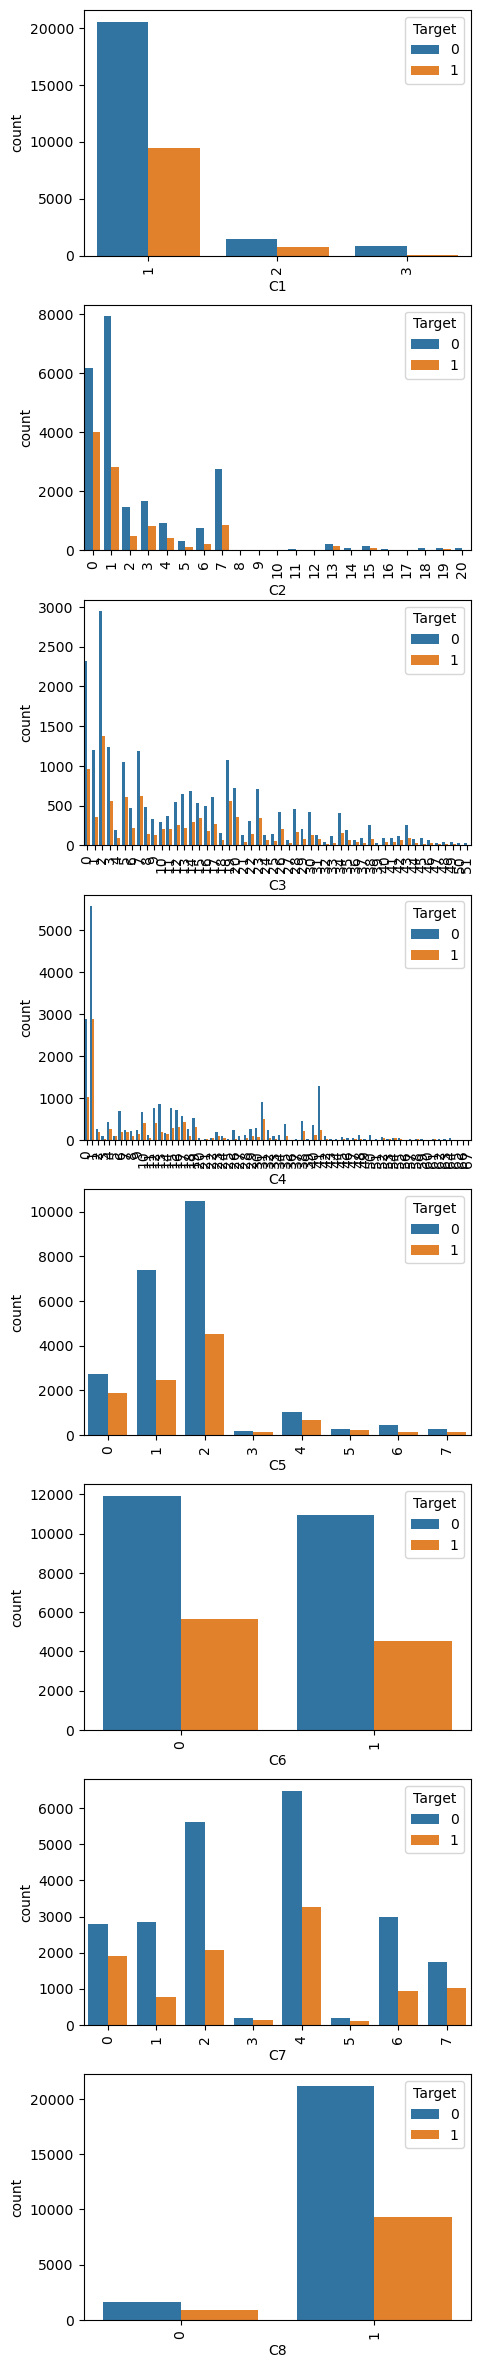

In [193]:
# Categorical Columns
plt.figure(figsize=(5,30))
i=1
for col in catgericalColumns:
    plt.subplot(len(catgericalColumns),1,i)
    sns.countplot(data=dataReady,x=col,hue='Target')
    plt.xticks(rotation='vertical')
    i=i+1

**Distribution of values from Numerical columns**

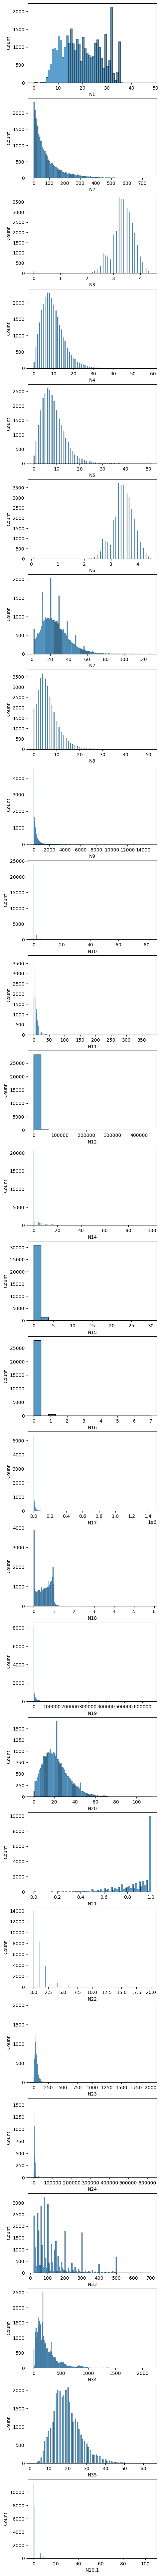

In [194]:
plt.figure(figsize=(5,100))
i=1
for col in numericalColumns:
    plt.subplot(len(numericalColumns),1,i)
    sns.histplot(dataReady[col])
    i=i+1

**Some Columns like N10, N12-N16 mostly have 0 as value**

**Plotting 'median' & 'mean' values of numerical columns by Target.**<br><br>
**LeftSide - Median plots; RightSide - Mean plots**

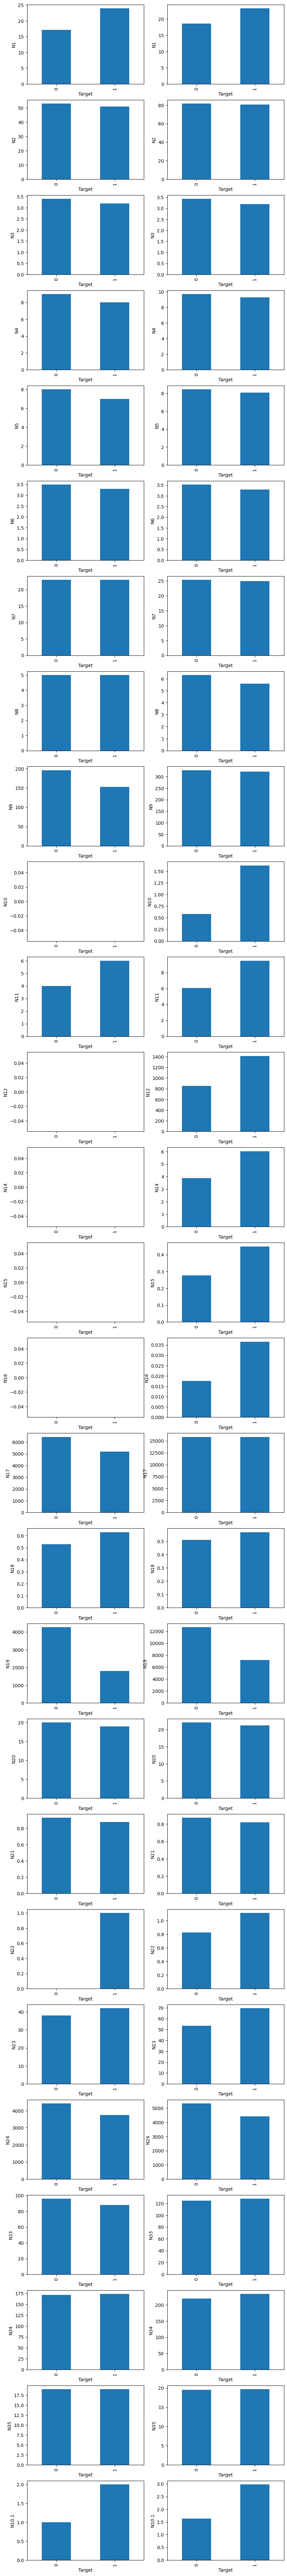

In [195]:
# Numerical Columns
plt.figure(figsize=(10,100))
i=1
for col in numericalColumns:
    plt.subplot(len(numericalColumns),2,i)
    dfTemp = dataReady.groupby('Target')[col].median().plot(kind='bar',ylabel=col)
    i=i+1
    
    plt.subplot(len(numericalColumns),2,i)
    dfTemp = dataReady.groupby('Target')[col].mean().plot(kind='bar',ylabel=col)
    i=i+1

## Feature Engineering and Scaling

**Train Test splitting: We shall perform train test split before Feature Scaling to avoid data leakage**

In [196]:
dataReady.head()

,Unique_ID,C1,C2,C3,C4,C5,C6,C7,C8,N1,...,N19,N20,N21,N22,N23,N24,N33,N34,N35,Target
0,Candidate_5926,1,0,11,31,0,0,0,1,23.75,...,NaN,NaN,NaN,NaN,27.816,1750.000000,58.0,113.39,12.0,1
1,Candidate_48134,1,4,2,66,2,0,1,1,11.05,...,25856.0,17.0,0.88,1.0,40.000,10833.333330,160.0,262.10,17.0,0
2,Candidate_51717,1,0,19,2,0,0,0,1,29.00,...,NaN,NaN,NaN,NaN,20.000,6250.000000,24.0,50.29,18.0,1
3,Candidate_26401,1,1,16,47,1,0,4,1,17.99,...,1006.0,6.0,1.00,0.0,26.000,2413.666667,70.0,126.52,27.0,0
4,Candidate_34872,1,1,13,1,1,1,6,1,27.50,...,3398.0,31.0,0.96,0.0,44.000,7666.666667,100.0,205.47,21.0,0


In [197]:
#Train Test splitting
X, y = dataReady.iloc[:,1:-1], dataReady.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.15,stratify=y,random_state=42)

In [198]:
X_train

,C1,C2,C3,C4,C5,C6,C7,C8,N1,N2,...,N18,N19,N20,N21,N22,N23,N24,N33,N34,N35
24050,1,0,23,1,4,0,3,0,17.00,1.0,...,0.57,3622.0,8.0,0.62,2.0,NaN,0.000000,160.0,0.00,12.0
24763,1,1,13,1,5,0,7,1,31.77,24.0,...,0.24,4947.0,22.0,0.81,2.0,106.0,1916.666667,80.0,173.71,31.0
31192,3,7,16,0,1,1,2,1,8.20,75.0,...,0.04,26830.0,5.0,1.00,0.0,10.0,6000.000000,69.0,300.43,13.0
14577,1,7,27,38,2,1,4,1,35.00,87.0,...,0.97,576.0,27.0,0.92,1.0,90.0,2500.000000,24.0,54.28,19.0
26636,1,1,5,16,2,0,2,1,22.75,15.0,...,0.35,10847.0,11.0,0.54,0.0,44.0,5000.000000,160.0,308.64,24.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30978,1,1,20,10,1,1,1,1,11.53,324.0,...,0.55,45975.0,37.0,1.00,0.0,64.0,12083.333330,300.0,494.85,31.0
25044,1,3,20,1,1,1,2,1,27.50,14.0,...,0.43,9007.0,20.0,0.95,2.0,54.0,4166.666667,100.0,205.47,15.0
6711,1,0,0,1,0,0,0,1,20.00,NaN,...,NaN,NaN,NaN,NaN,NaN,4.0,2250.000000,24.0,44.60,23.0
3329,1,5,19,16,2,1,4,1,16.00,70.0,...,0.00,0.0,11.0,1.00,1.0,24.0,4125.833333,34.0,59.77,21.0


**Using KNN imputer for imputing missing values in Numerical columns**

In [199]:
imputer = KNNImputer(n_neighbors=5)
scaler  = StandardScaler()

#scaling
scaler.fit(X_train.iloc[:,8:35])
X_train.iloc[:,8:35] = scaler.transform(X_train.iloc[:,8:35])

#Imputing
imputer.fit(X_train.iloc[:,8:35])
numVals = pd.DataFrame(imputer.transform(X_train.iloc[:,8:35]), columns=X_train.columns[8:])

numVals

,N1,N2,N3,N4,N5,N6,N7,N8,N9,N10,...,N18,N19,N20,N21,N22,N23,N24,N33,N34,N35
0,-0.367205,-0.939284,0.099968,-0.462482,-0.272460,0.099968,-1.136009,-0.020345,-0.712995,-0.339713,...,0.116483,-0.338168,-1.107203,-1.369504,0.891945,-0.138179,-0.771177,0.327412,-1.201112,-1.031182
1,1.457214,-0.671336,0.342183,-0.104415,-0.072658,0.342183,0.054489,0.199648,-0.437888,-0.339713,...,-0.828137,-0.277729,0.019422,-0.272106,0.891945,0.320367,-0.479452,-0.437641,-0.271918,1.548950
2,-1.454198,-0.077191,1.795475,-0.999583,-1.071668,1.795475,-1.416126,-0.900318,-0.680244,-0.339713,...,-1.400634,0.720438,-1.348622,0.825292,-0.739724,-0.323206,0.142048,-0.542835,0.405922,-0.895385
3,1.856190,0.062608,-1.111108,1.327853,1.725559,-1.111108,0.334606,1.739599,0.634157,0.039940,...,1.261477,-0.477107,0.421788,0.363230,0.076110,0.213105,-0.390666,-0.973178,-0.910762,-0.080607
4,0.343046,-0.776186,0.584399,-0.283449,-0.672064,0.584399,-0.995950,-0.460332,-0.162781,-0.339713,...,-0.513263,-0.008608,-0.865783,-1.831566,-0.739724,-0.095274,-0.010156,0.327412,0.449838,0.598375
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28087,-1.042870,2.823638,0.584399,1.864954,1.925361,0.584399,0.894840,1.959592,3.014054,-0.339713,...,0.059234,1.593715,1.226520,0.825292,-0.739724,0.038804,1.067957,1.666254,1.445897,1.548950
28088,0.929776,-0.787835,1.068829,0.074618,-0.072658,1.068829,-0.225628,-0.020345,-0.265400,-0.339713,...,-0.284264,-0.092537,-0.141524,0.536503,0.891945,-0.028235,-0.136993,-0.246377,-0.102030,-0.623792
28089,0.003361,0.193087,-8.135350,-1.321844,-1.271470,-8.135350,-1.486155,-1.340304,-0.712995,0.039940,...,0.677530,-0.503089,-1.348622,-3.391027,-0.739724,-0.363429,-0.428717,-0.973178,-0.962542,0.462579
28090,-0.490727,-0.135440,0.342183,-1.178617,-1.071668,0.342183,-0.785862,-1.340304,-0.712995,-0.339713,...,-1.515133,-0.503381,-0.865783,0.825292,0.076110,-0.229352,-0.143208,-0.877546,-0.881396,0.190986


**Applying OneHot Encoding for Categorical columns.**<br><br>
<span style="text-decoration: underline;">**NOTE**</span>**: Here we do NOT know the type of categorical variables. If we have Ordinal Categorical variables, we can always use Label Encoding for them.**

In [200]:
encoder = OneHotEncoder(drop='first')
catVals = pd.DataFrame(encoder.fit_transform(X_train.iloc[:,:8]).toarray(), columns=encoder.get_feature_names_out())
catVals

,C1_2,C1_3,C2_1,C2_2,C2_3,C2_4,C2_5,C2_6,C2_7,C2_8,...,C5_7,C6_1,C7_1,C7_2,C7_3,C7_4,C7_5,C7_6,C7_7,C8_1
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28087,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
28088,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
28089,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
28090,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [201]:
#Combining both dfs
X_train = pd.concat([numVals,catVals],axis=1)
X_train

,N1,N2,N3,N4,N5,N6,N7,N8,N9,N10,...,C5_7,C6_1,C7_1,C7_2,C7_3,C7_4,C7_5,C7_6,C7_7,C8_1
0,-0.367205,-0.939284,0.099968,-0.462482,-0.272460,0.099968,-1.136009,-0.020345,-0.712995,-0.339713,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,1.457214,-0.671336,0.342183,-0.104415,-0.072658,0.342183,0.054489,0.199648,-0.437888,-0.339713,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
2,-1.454198,-0.077191,1.795475,-0.999583,-1.071668,1.795475,-1.416126,-0.900318,-0.680244,-0.339713,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1.856190,0.062608,-1.111108,1.327853,1.725559,-1.111108,0.334606,1.739599,0.634157,0.039940,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,0.343046,-0.776186,0.584399,-0.283449,-0.672064,0.584399,-0.995950,-0.460332,-0.162781,-0.339713,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28087,-1.042870,2.823638,0.584399,1.864954,1.925361,0.584399,0.894840,1.959592,3.014054,-0.339713,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
28088,0.929776,-0.787835,1.068829,0.074618,-0.072658,1.068829,-0.225628,-0.020345,-0.265400,-0.339713,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
28089,0.003361,0.193087,-8.135350,-1.321844,-1.271470,-8.135350,-1.486155,-1.340304,-0.712995,0.039940,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
28090,-0.490727,-0.135440,0.342183,-1.178617,-1.071668,0.342183,-0.785862,-1.340304,-0.712995,-0.339713,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


## Model Training with HyperParameter tuning and CV

**We shall first transform X_test values and save them as X_testNew**

In [202]:
X_test.iloc[:,8:35] = scaler.transform(X_test.iloc[:,8:35])
testNumVals = pd.DataFrame(imputer.transform(X_test.iloc[:,8:35]), columns=X_test.columns[8:])
testCatVals = pd.DataFrame(encoder.transform(X_test.iloc[:,:8]).toarray(), columns=encoder.get_feature_names_out())
X_testNew = pd.concat([testNumVals,testCatVals],axis=1)

### Logistic Regression

In [203]:
model = LogisticRegression(penalty='l1',solver='liblinear')

parameters = {'C': [0.01, 0.1, 0.2, 0.5, 0.7, 1,]}
clf = GridSearchCV(model, parameters,cv=3,verbose=1.1,scoring='roc_auc',return_train_score=True)
clf.fit(X_train,y_train)

Fitting 3 folds for each of 6 candidates, totalling 18 fits
[CV] END .............................................C=0.01; total time=   0.3s
[CV] END .............................................C=0.01; total time=   0.2s
[CV] END .............................................C=0.01; total time=   0.2s
[CV] END ..............................................C=0.1; total time=   0.5s
[CV] END ..............................................C=0.1; total time=   0.5s
[CV] END ..............................................C=0.1; total time=   0.4s
[CV] END ..............................................C=0.2; total time=   0.5s
[CV] END ..............................................C=0.2; total time=   0.6s
[CV] END ..............................................C=0.2; total time=   0.5s
[CV] END ..............................................C=0.5; total time=   0.7s
[CV] END ..............................................C=0.5; total time=   1.0s
[CV] END ........................................

GridSearchCV(cv=3,
             estimator=LogisticRegression(penalty='l1', solver='liblinear'),
             param_grid={'C': [0.01, 0.1, 0.2, 0.5, 0.7, 1]},
             return_train_score=True, scoring='roc_auc', verbose=1.1)

In [204]:
clf.cv_results_['mean_test_score']

array([0.73764162, 0.75289445, 0.75553637, 0.75687038, 0.75698823,
       0.75702607])

In [205]:
clf.cv_results_['mean_train_score']

array([0.73920588, 0.75920657, 0.76339264, 0.76763863, 0.76850942,
       0.76908068])

**Selecting c=0.2**

In [206]:
LR = LogisticRegression(C=0.2,penalty='l1',solver='liblinear')
LR.fit(X_train,y_train)
preds = LR.predict_proba(X_testNew)[:,1]
print('Score: ',roc_auc_score(y_test,preds))

Score:  0.7598078577218564


### RandomForest

In [207]:
model = RandomForestClassifier()

parameters = {'n_estimators': [10, 100, 200, 300], 'max_depth': [3,4,5,6]}
clf = GridSearchCV(model, parameters,cv=3,verbose=1.1,scoring='roc_auc',return_train_score=True)
clf.fit(X_train,y_train)

Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV] END .......................max_depth=3, n_estimators=10; total time=   0.1s
[CV] END .......................max_depth=3, n_estimators=10; total time=   0.1s
[CV] END .......................max_depth=3, n_estimators=10; total time=   0.1s
[CV] END ......................max_depth=3, n_estimators=100; total time=   1.3s
[CV] END ......................max_depth=3, n_estimators=100; total time=   1.3s
[CV] END ......................max_depth=3, n_estimators=100; total time=   1.3s
[CV] END ......................max_depth=3, n_estimators=200; total time=   3.0s
[CV] END ......................max_depth=3, n_estimators=200; total time=   2.7s
[CV] END ......................max_depth=3, n_estimators=200; total time=   2.6s
[CV] END ......................max_depth=3, n_estimators=300; total time=   4.1s
[CV] END ......................max_depth=3, n_estimators=300; total time=   4.2s
[CV] END ......................max_depth=3, n_es

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [3, 4, 5, 6],
                         'n_estimators': [10, 100, 200, 300]},
             return_train_score=True, scoring='roc_auc', verbose=1.1)

In [208]:
clf.cv_results_

{'mean_fit_time': array([0.17087833, 1.32401061, 2.70882901, 3.96105266, 0.19902301,
        1.65997609, 3.28352316, 4.94342311, 0.24051968, 2.01236192,
        3.935438  , 5.85202392, 0.30732401, 2.59239761, 4.66215889,
        7.35485848]),
 'std_fit_time': array([0.01449885, 0.01495613, 0.14920149, 0.00765327, 0.01707265,
        0.01313948, 0.00819079, 0.09978687, 0.00415202, 0.02214239,
        0.02706374, 0.03184058, 0.00083453, 0.09402427, 0.04902988,
        0.15426618]),
 'mean_score_time': array([0.01841172, 0.09425855, 0.1819543 , 0.27333911, 0.03064815,
        0.11129133, 0.19439777, 0.29437367, 0.02313344, 0.12586832,
        0.21603489, 0.32199335, 0.02747814, 0.1341788 , 0.24125004,
        0.36406334]),
 'std_score_time': array([3.94590045e-03, 2.26208854e-05, 5.13778406e-03, 1.28674244e-02,
        4.75776897e-03, 2.06159250e-03, 6.26842782e-03, 2.10358747e-03,
        1.37575605e-03, 3.16635013e-04, 7.55461566e-03, 3.97294598e-03,
        5.69410742e-03, 1.06383952e-

In [209]:
a, b = len(parameters['max_depth']), len(parameters['n_estimators'])
pd.DataFrame(clf.cv_results_['mean_test_score'].reshape((a,b)),index=parameters['max_depth'], columns=parameters['n_estimators'])

,10,100,200,300
3,0.701394,0.718524,0.717462,0.718494
4,0.709421,0.720746,0.723300,0.723216
5,0.722106,0.729162,0.730075,0.729942
6,0.723440,0.735243,0.734378,0.735719


In [210]:
pd.DataFrame(clf.cv_results_['mean_train_score'].reshape((a,b)),index=parameters['max_depth'], columns=parameters['n_estimators'])

,10,100,200,300
3,0.709466,0.726949,0.725488,0.726058
4,0.721358,0.734420,0.735503,0.735339
5,0.737764,0.747463,0.748813,0.748469
6,0.746743,0.763870,0.763842,0.764032


**Selecting 'n_estimators'=300 & 'max_depth'=5**

In [211]:
RFC = RandomForestClassifier(n_estimators=300,max_depth=5)

In [212]:
RFC.fit(X_train,y_train)
preds = RFC.predict_proba(X_testNew)[:,1]
print('Score: ',roc_auc_score(y_test,preds))

Score:  0.7363854906392298


### XGBoost

In [213]:
XGBC = xgb.XGBClassifier()

parameters = {
    'learning_rate': [0.1,0.5,1],
    'max_depth': [2, 3, 5],
    'n_estimators': [5,10,50]
}

clf = GridSearchCV(XGBC, parameters, scoring='roc_auc', cv=3,return_train_score=True, verbose=1.1)
clf.fit(X_train,y_train)

Fitting 3 folds for each of 27 candidates, totalling 81 fits
[CV] END .....learning_rate=0.1, max_depth=2, n_estimators=5; total time=   0.3s
[CV] END .....learning_rate=0.1, max_depth=2, n_estimators=5; total time=   0.3s
[CV] END .....learning_rate=0.1, max_depth=2, n_estimators=5; total time=   0.3s
[CV] END ....learning_rate=0.1, max_depth=2, n_estimators=10; total time=   0.4s
[CV] END ....learning_rate=0.1, max_depth=2, n_estimators=10; total time=   0.4s
[CV] END ....learning_rate=0.1, max_depth=2, n_estimators=10; total time=   0.4s
[CV] END ....learning_rate=0.1, max_depth=2, n_estimators=50; total time=   1.2s
[CV] END ....learning_rate=0.1, max_depth=2, n_estimators=50; total time=   1.2s
[CV] END ....learning_rate=0.1, max_depth=2, n_estimators=50; total time=   1.2s
[CV] END .....learning_rate=0.1, max_depth=3, n_estimators=5; total time=   0.3s
[CV] END .....learning_rate=0.1, max_depth=3, n_estimators=5; total time=   0.3s
[CV] END .....learning_rate=0.1, max_depth=3, n_

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': [0.1, 0.5, 1], 'max_depth': [2, 3, 5],
                         'n_estimators': [5, 10, 50]},
             return_train_score=True, scoring='roc_auc', verbose=1.1)

In [214]:
clf.cv_results_

{'mean_fit_time': array([0.33954914, 0.43980122, 1.24428058, 0.41463709, 0.52560743,
        1.68973962, 0.48616552, 0.65088121, 2.35202964, 0.36170522,
        0.43647234, 1.40807748, 0.43902397, 0.58118796, 1.79202016,
        0.47450344, 0.71828437, 2.32926869, 0.33980544, 0.42321674,
        1.20258403, 0.38503098, 0.55845841, 1.68808579, 0.49158303,
        0.71099043, 2.4480559 ]),
 'std_fit_time': array([0.01382859, 0.01089907, 0.00764984, 0.01874774, 0.01693488,
        0.06586501, 0.02855957, 0.01774182, 0.03117677, 0.03469505,
        0.02398235, 0.09651486, 0.01474918, 0.07257946, 0.24060164,
        0.03241054, 0.04526882, 0.01625013, 0.02673608, 0.02185235,
        0.01463142, 0.01950004, 0.03820586, 0.03903906, 0.01960466,
        0.0321566 , 0.07677831]),
 'mean_score_time': array([0.04189197, 0.03654973, 0.04566185, 0.04139884, 0.05294275,
        0.04775055, 0.05054092, 0.03658422, 0.04802664, 0.05114476,
        0.03682001, 0.04531503, 0.05067603, 0.04908419, 0.047245

In [215]:
clf.cv_results_['mean_test_score'].reshape((3,3,3))

array([[[0.69780286, 0.70706181, 0.74170343],
        [0.71307925, 0.721253  , 0.75048755],
        [0.72735335, 0.73683311, 0.75720937]],

       [[0.72036693, 0.73696516, 0.75700284],
        [0.72950651, 0.74497916, 0.75580965],
        [0.74064268, 0.74626272, 0.74711774]],

       [[0.72968433, 0.73781637, 0.74999542],
        [0.73504357, 0.74065734, 0.74191892],
        [0.73711365, 0.73541774, 0.71574307]]])

In [216]:
clf.cv_results_['mean_train_score'].reshape((3,3,3))

array([[[0.69954235, 0.71114303, 0.75191223],
        [0.72024722, 0.7301023 , 0.76979724],
        [0.74939312, 0.76421696, 0.81557086]],

       [[0.72636416, 0.74735813, 0.78421444],
        [0.74118893, 0.76178368, 0.81148959],
        [0.77725316, 0.80378555, 0.8888538 ]],

       [[0.73646773, 0.7523467 , 0.79215327],
        [0.75058232, 0.76844585, 0.82865967],
        [0.78469114, 0.81196363, 0.92341942]]])

**Selecting 'n_estimators'=50 , 'max_depth'=3 and learning_rate=0.5**

In [224]:
XGBC = xgb.XGBClassifier(max_depth=3,n_estimators=50,learning_rate=0.5)

XGBC.fit(X_train,y_train)
preds = XGBC.predict_proba(X_testNew)[:,1]
print('Score: ',roc_auc_score(y_test,preds))

Score:  0.7643879424488019


**Since we do NOT have any specific time complexity requirements, we shall choose XGBoost as our model to make new predictions as it has better AUC score compared to Logistic Regression.**

## Predictions on new unseen test dataset

In [225]:
testData = pd.read_csv(r"C:\Users\madha\Downloads\DS Test\DS Test\Test\X_test.csv")
testData

,Unique_ID,C1,C2,C3,C4,C5,C6,C7,C8,N1,...,N26,N27,N28,N29,N30,N31,N32,N33,N34,N35
0,Candidate_1602,1,0,0,23,0,True,0,True,18.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.0,90.38,23.0
1,Candidate_29650,1,0,2,4,2,True,2,True,16.75,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,300.0,532.93,16.0
2,Candidate_31061,1,2,3,38,1,False,4,True,29.99,...,6.0,6.0,0.0,0.0,5000.0,4334.59,-82.0,80.0,169.78,22.0
3,Candidate_5768,1,1,28,20,2,False,2,True,17.70,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,150.0,270.02,13.0
4,Candidate_27059,1,1,15,1,3,False,5,False,28.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.0,103.41,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11012,Candidate_7453,1,0,3,0,2,True,1,True,15.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,400.0,693.31,20.0
11013,Candidate_38211,1,0,0,40,0,False,0,True,18.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.0,36.15,10.0
11014,Candidate_25020,1,19,1,24,1,True,4,True,31.77,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,80.0,173.71,22.0
11015,Candidate_44501,1,1,19,1,2,False,4,True,18.00,...,11.0,11.0,0.0,0.0,1200.0,0.00,-24.0,24.0,43.38,26.0


In [226]:
Unique_IDs = testData['Unique_ID'].copy()
testData.drop(columns=['N25','N26','N27','N28','N29','N30','N31','N32','Unique_ID'],axis=1,inplace=True)

In [227]:
testData.iloc[:,8:35] = scaler.transform(testData.iloc[:,8:35])
testDataNumVals = pd.DataFrame(imputer.transform(testData.iloc[:,8:35]), columns=testData.columns[8:])
testDataCatVals = pd.DataFrame(encoder.transform(testData.iloc[:,:8]).toarray(), columns=encoder.get_feature_names_out())
testDataNew = pd.concat([testDataNumVals,testDataCatVals],axis=1)
testDataNew

,N1,N2,N3,N4,N5,N6,N7,N8,N9,N10,...,C5_7,C6_1,C7_1,C7_2,C7_3,C7_4,C7_5,C7_6,C7_7,C8_1
0,-0.243683,-0.058551,-0.384462,-0.748936,-0.751985,-0.384462,0.124518,-0.900318,-0.712995,0.799248,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,-0.398085,0.295607,0.826614,-0.462482,-0.871866,0.826614,-0.435716,-0.460332,0.426735,-0.339713,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1.237345,-0.426688,-0.384462,-0.820550,-0.871866,-0.384462,1.665162,-0.680325,-0.540507,-0.339713,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,-0.280739,-0.717936,-0.142247,-0.462482,-0.472262,-0.142247,-1.065980,-0.240338,-0.060161,0.039940,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.991537,-0.927634,-0.868893,1.864954,1.925361,-0.868893,0.614723,1.299613,0.151628,-0.339713,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11012,-0.614249,-0.368439,0.342183,-0.462482,-0.272460,0.342183,0.474664,-0.460332,-0.422604,0.419594,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
11013,-0.243683,-0.743566,-1.353323,-1.250230,-1.311430,-1.353323,-1.626214,-1.120311,-0.680244,0.039940,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
11014,1.457214,-0.251939,0.584399,0.432686,0.726550,0.584399,2.155367,1.739599,-0.062345,2.317863,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
11015,-0.243683,0.412106,0.584399,-0.283449,-0.472262,0.584399,-0.015540,-0.460332,-0.492473,0.039940,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [228]:
finalPreds = XGBC.predict_proba(testDataNew)[:,1]
finalPreds

array([0.43703797, 0.30975515, 0.37486535, ..., 0.23352347, 0.21995687,
       0.10732634], dtype=float32)

In [229]:
finaldf = pd.DataFrame(Unique_IDs)
finaldf['Class_1_Probability'] = pd.Series(finalPreds).map(lambda x: np.round(x,4))  #rounding off 4 decimals
finaldf

,Unique_ID,Class_1_Probability
0,Candidate_1602,0.4370
1,Candidate_29650,0.3098
2,Candidate_31061,0.3749
3,Candidate_5768,0.2113
4,Candidate_27059,0.3405
...,...,...
11012,Candidate_7453,0.7977
11013,Candidate_38211,0.1066
11014,Candidate_25020,0.2335
11015,Candidate_44501,0.2200


In [231]:
#finaldf.to_csv("final_predictions.csv",index=False)